In [ ]:
"""
Assignment: 4
Task : K-means Clustering
ID: 190104140
Section: C2

"""

In [2]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(140)
pd.np.random.seed(140)

<ipython-input-2-e784d7066a12>:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  pd.np.random.seed(140)


In [3]:
# uploaded = files.upload()

df = pd.read_csv("/content/data_k_mean.txt", sep = " " ,  header = None, dtype = np.float64)

df = df.rename(columns={0: "feature1", 1: "feature2"})
df

,feature1,feature2
0,-7.87157,-4.86573
1,-4.76661,-6.87944
2,-6.67986,-5.83080
3,-8.93021,-4.15571
4,-7.91375,-4.22840
...,...,...
2995,-8.06037,-4.84080
2996,7.47328,0.37321
2997,6.91832,-0.32132
2998,-8.23828,-4.00405


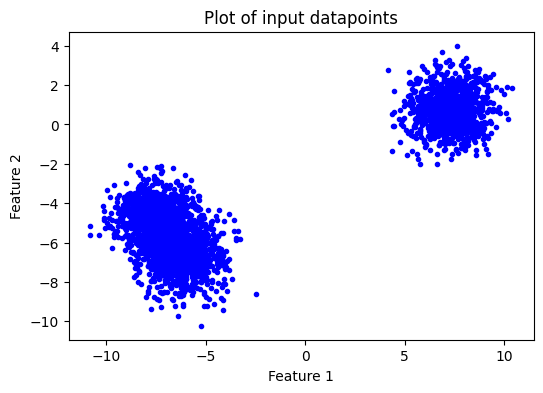

In [4]:
# Plot of input datapoints

plt.close()
plt.figure(figsize=(6, 4))
plt.scatter(df["feature1"], df["feature2"], c="b", marker=".")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Plot of input datapoints")
plt.show()

In [5]:
# Applying K-means Clustering algorithm

K = 2
centroids = df.sample(n = K).values.tolist()
distances= pd.DataFrame()

for i in range(K):
  distances[i] = ( (df["feature1"]-centroids[i][0])**2 + (df["feature2"]-centroids[i][1])**2 )**0.5

df["class"] = distances.idxmin(axis=1)


iter = 0
while(True):
  iter += 1
  print("Iteration: ", iter)

  current_label = df["class"]

  # Calculating the value of new centroid
  centroids = list()
  for i in range(K):
    cluster = df[df["class"] == i]
    centroids.append( (cluster["feature1"].mean(), cluster["feature2"].mean()) )

  # Calculating distance of each datapoint from the centroids
  for i in range(K):
    distances[i] = ( (df["feature1"]-centroids[i][0])**2 + (df["feature2"]-centroids[i][1])**2 )**0.5

  # Tagging each datapoint with the index of the closest centroid
  df["class"] = distances.idxmin(axis=1)

  # Checking if the class labels changed or not
  if((df["class"] == current_label).all()):
    break

print("Done!")


Iteration:  1
Iteration:  2
Done!


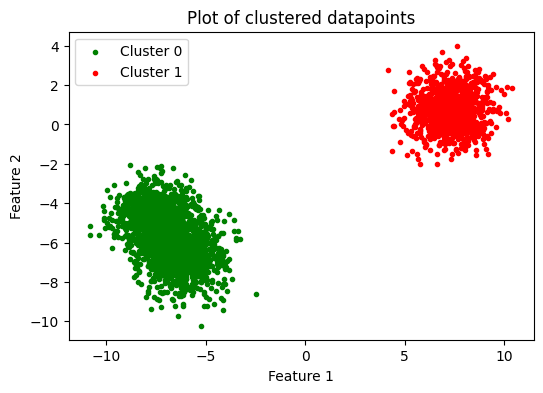

In [6]:
# Plot of clustered datapoints
colors = ["g","r","c","m","y","b","k"]

plt.close()
plt.figure(figsize=(6, 4))
for i in range(K):
  cluster = df[df["class"] == i]
  plt.scatter(cluster["feature1"], cluster["feature2"], c=colors[i], marker=".", label = "Cluster "+ str(i))

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Plot of clustered datapoints")
plt.legend()
plt.show()